## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Read CSV file

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

## Examine Dataset

#### Examine Area Type Feature

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Drop Columns which is not necessary for predicting tha Data

In [5]:
df1 = df.drop(['area_type','availability',"society","balcony"],axis="columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

#### Handling the NA value

In [6]:
df1.isnull().sum() #return no. of rows where null value present in each columns

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
def impute_median(series): #Define a function impute_median to get the median
    return series.fillna(series.median())

In [8]:
df1.bath  =df1["bath"].transform(impute_median) #Fill the null values of "bath" using its median

In [9]:
df2 = df1.dropna() #drop all the remaining null values

In [10]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13303, 5)

#### Explore the 'Size' variable and handling the different types of values

In [12]:
df2['size'].unique() #return all unique values present in "size" variable

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0])) #create a new column "bhk" from 'size' column
df2.head()

C:\Users\sam16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2.bhk>20] #check if is there any unusual value present in bhk

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df2.total_sqft.unique()#check wheather all value is single value or not if not then change it

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x): # create a function to check the value is float or not 
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(10) #it return value only which is False acc to is_float function

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [19]:
#create a function to convert the range values, integer values into the float
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [21]:
df3 = df2.copy()
df3["total_sqft"] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

## Feature Engineering

In [23]:
df3["price_per_sqft"] = df3['price']*100000/df3['total_sqft'] #create new feature using two previous columns
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
#explore "location" column
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df3.location.unique())

1304

In [26]:
df3.location = df3.location.apply(lambda x: x.strip()) #Remove unnecessary spaces

In [27]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False) #count the no. houses are present in each location
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
loc_stats_less_than_10 = location_stats[location_stats<=10] #return location which have less than 10 houses
loc_stats_less_than_10

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df3.location.unique())

242

## Outlier Removal

In [31]:
df3[df3.total_sqft/df3.bhk<300].head() #unusual data which is not be true like 6 or 8 bedroom is just 1000-1500 sqft 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df3.shape

(13303, 7)

In [33]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)] #remove unusual values acc. to sqft
df4.shape

(12559, 7)

In [34]:
 df4.price_per_sqft.describe() #check unusual price value 

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_outliers(df): #create function to remove the unusual price according to location
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_outliers(df4)
df5.shape

(10286, 7)

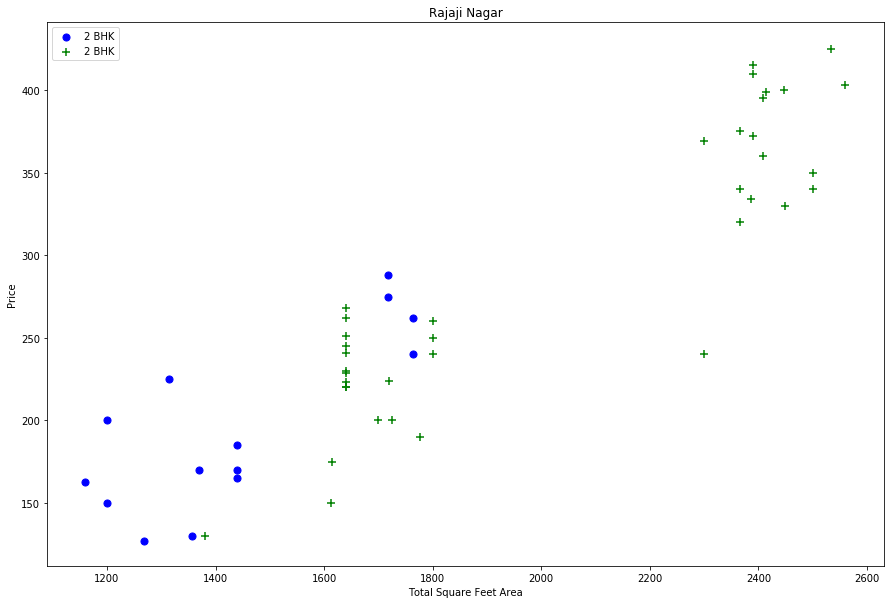

In [36]:
#ceate a scatter plot to explore the price of 2&3 bhk house
def scatter_plot(df,loc):
    bhk2 = df[(df.location==loc) & (df.bhk==2)]
    bhk3 = df[(df.location==loc) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="green",marker="+",label="2 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(loc)
    plt.legend()
    
scatter_plot(df5,"Rajaji Nagar")

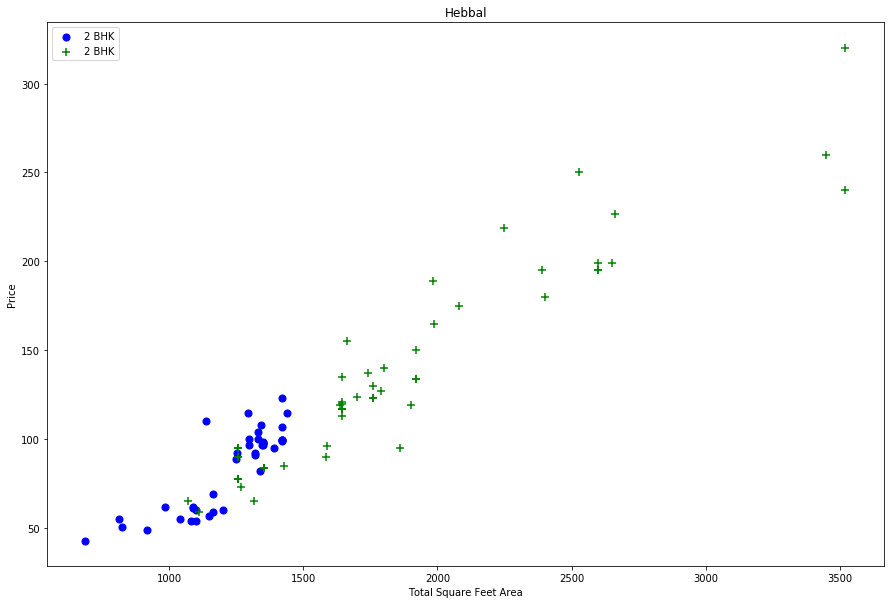

In [37]:
scatter_plot(df5,"Hebbal")

In [38]:
grouped = df5.groupby('location')

for location,location_df in grouped:
    for bhk,bhk_df in location_df.groupby("bhk"):
        print(location)
 
        print(bhk)
        print(bhk_df)

1st Block Jayanagar
2
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
1st Block Jayanagar
3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
1st Block Jayanagar
4
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
1st Phase JP Nagar
1
              location   size  total_sqft  bath  price  bhk  price_per_sqft
16  1st Phase JP Nagar  1 BHK       840.0   2.0   50.0    1     5952.380952
1

              location   size  total_sqft  bath  price  bhk  price_per_sqft
78  6th Phase JP Nagar  4 BHK      3245.0   4.0  250.0    4     7704.160247
7th Phase JP Nagar
1
               location       size  total_sqft  bath  price  bhk  \
182  7th Phase JP Nagar      1 BHK       750.0   1.0   47.0    1   
184  7th Phase JP Nagar  1 Bedroom      1000.0   1.0   60.0    1   

     price_per_sqft  
182     6266.666667  
184     6000.000000  
7th Phase JP Nagar
2
               location   size  total_sqft  bath   price  bhk  price_per_sqft
90   7th Phase JP Nagar  2 BHK      1080.0   2.0   72.00    2     6666.666667
91   7th Phase JP Nagar  2 BHK      1270.0   2.0   93.00    2     7322.834646
94   7th Phase JP Nagar  2 BHK      1245.0   2.0   94.00    2     7550.200803
95   7th Phase JP Nagar  2 BHK      1175.0   2.0   82.00    2     6978.723404
98   7th Phase JP Nagar  2 BHK      1050.0   2.0   71.00    2     6761.904762
99   7th Phase JP Nagar  2 BHK      1100.0   2.0   46.00    2     4

2
               location   size  total_sqft  bath   price  bhk  price_per_sqft
191  8th Phase JP Nagar  2 BHK      1073.5   2.0  54.005    2     5030.740568
194  8th Phase JP Nagar  2 BHK      1062.0   2.0  42.470    2     3999.058380
197  8th Phase JP Nagar  2 BHK       871.0   2.0  55.000    2     6314.580941
198  8th Phase JP Nagar  2 BHK      1098.0   2.0  43.910    2     3999.089253
201  8th Phase JP Nagar  2 BHK      1080.0   2.0  38.000    2     3518.518519
202  8th Phase JP Nagar  2 BHK      1059.0   2.0  34.500    2     3257.790368
203  8th Phase JP Nagar  2 BHK      1080.0   2.0  35.000    2     3240.740741
205  8th Phase JP Nagar  2 BHK      1062.0   2.0  42.470    2     3999.058380
207  8th Phase JP Nagar  2 BHK      1100.0   2.0  35.000    2     3181.818182
209  8th Phase JP Nagar  2 BHK      1035.0   2.0  39.330    2     3800.000000
210  8th Phase JP Nagar  2 BHK       909.0   2.0  40.900    2     4499.449945
214  8th Phase JP Nagar  2 BHK      1125.0   2.0  36.940    2 

285  Abbigere  1 BHK       734.0   1.0  19.82    1     2700.272480
Abbigere
2
     location   size  total_sqft  bath  price  bhk  price_per_sqft
279  Abbigere  2 BHK       985.0   2.0  40.39    2     4100.507614
282  Abbigere  2 BHK       880.0   2.0  35.00    2     3977.272727
283  Abbigere  2 BHK       795.0   2.0  32.54    2     4093.081761
284  Abbigere  2 BHK      1005.0   2.0  39.59    2     3939.303483
287  Abbigere  2 BHK      1020.0   2.0  41.82    2     4100.000000
288  Abbigere  2 BHK       985.0   2.0  40.39    2     4100.507614
290  Abbigere  2 BHK       795.0   2.0  32.54    2     4093.081761
291  Abbigere  2 BHK      1130.0   2.0  46.33    2     4100.000000
292  Abbigere  2 BHK       795.0   1.0  32.60    2     4100.628931
294  Abbigere  2 BHK       985.0   2.0  38.92    2     3951.269036
295  Abbigere  2 BHK      1000.0   2.0  41.00    2     4100.000000
296  Abbigere  2 BHK       995.0   2.0  40.80    2     4100.502513
297  Abbigere  2 BHK      1020.0   2.0  40.80    2 

409  Amruthahalli  2 BHK      1025.0   2.0   42.0    2     4097.560976
Amruthahalli
3
         location       size  total_sqft  bath  price  bhk  price_per_sqft
393  Amruthahalli  3 Bedroom      1900.0   3.0  135.0    3     7105.263158
398  Amruthahalli      3 BHK      1350.0   2.0   63.0    3     4666.666667
399  Amruthahalli      3 BHK      1605.0   3.0   65.0    3     4049.844237
400  Amruthahalli      3 BHK      1700.0   3.0   77.0    3     4529.411765
401  Amruthahalli      3 BHK      1450.0   2.0   85.0    3     5862.068966
407  Amruthahalli      3 BHK      2650.0   4.0  175.0    3     6603.773585
408  Amruthahalli      3 BHK      1450.0   2.0   90.0    3     6206.896552
Anandapura
2
       location       size  total_sqft  bath  price  bhk  price_per_sqft
411  Anandapura      2 BHK      1167.0   2.0  43.76    2     3749.785775
412  Anandapura  2 Bedroom      1000.0   2.0  55.00    2     5500.000000
413  Anandapura      2 BHK      1141.0   2.0  42.79    2     3750.219106
415  Anan

530  Arekere  4 BHK      2710.0   6.0  142.0    4     5239.852399
Attibele
1
     location   size  total_sqft  bath  price  bhk  price_per_sqft
533  Attibele  1 BHK       450.0   1.0  11.00    1     2444.444444
536  Attibele  1 BHK       400.0   1.0  11.00    1     2750.000000
537  Attibele  1 BHK       400.0   1.0  12.00    1     3000.000000
538  Attibele  1 BHK       400.0   1.0  14.00    1     3500.000000
539  Attibele  1 BHK       500.0   1.0  17.00    1     3400.000000
541  Attibele  1 BHK       395.0   1.0  10.25    1     2594.936709
542  Attibele  1 BHK       420.0   1.0  17.00    1     4047.619048
544  Attibele  1 BHK       418.0   1.0  12.00    1     2870.813397
546  Attibele  1 BHK       400.0   1.0  10.00    1     2500.000000
550  Attibele  1 BHK       450.0   1.0  12.50    1     2777.777778
554  Attibele  1 BHK       782.0   1.0  19.55    1     2500.000000
557  Attibele  1 BHK       400.0   1.0  11.50    1     2875.000000
558  Attibele  1 BHK       460.0   1.0  13.00    1  

Banashankari
1
         location   size  total_sqft  bath  price  bhk  price_per_sqft
705  Banashankari  1 BHK      2400.0   1.0  200.0    1     8333.333333
715  Banashankari  1 BHK       720.0   1.0   60.0    1     8333.333333
Banashankari
2
         location   size  total_sqft  bath  price  bhk  price_per_sqft
685  Banashankari  2 BHK      1077.0   2.0  37.64    2     3494.893222
689  Banashankari  2 BHK      1125.0   2.0  63.00    2     5600.000000
691  Banashankari  2 BHK      1310.0   2.0  80.00    2     6106.870229
694  Banashankari  2 BHK      1260.0   2.0  75.00    2     5952.380952
695  Banashankari  2 BHK      1170.0   2.0  46.79    2     3999.145299
699  Banashankari  2 BHK      1330.0   2.0  78.00    2     5864.661654
702  Banashankari  2 BHK      1020.0   2.0  40.79    2     3999.019608
703  Banashankari  2 BHK      1600.0   2.0  63.98    2     3998.750000
704  Banashankari  2 BHK      1041.0   2.0  36.44    2     3500.480307
706  Banashankari  2 BHK      1390.0   2.0  86.

                  location   size  total_sqft  bath   price  bhk  \
786  Banashankari Stage VI  2 BHK      1177.5   2.0  59.935    2   
790  Banashankari Stage VI  2 BHK      1160.0   2.0  59.000    2   
791  Banashankari Stage VI  2 BHK      1180.0   2.0  59.470    2   

     price_per_sqft  
786     5090.021231  
790     5086.206897  
791     5039.830508  
Banashankari Stage VI
3
                  location   size  total_sqft  bath   price  bhk  \
792  Banashankari Stage VI  3 BHK      1423.0   2.0  71.730    3   
793  Banashankari Stage VI  3 BHK      1392.0   3.0  69.460    3   
794  Banashankari Stage VI  3 BHK      1410.5   2.0  70.385    3   

     price_per_sqft  
792     5040.758960  
793     4989.942529  
794     4990.074442  
Banashankari Stage VI
4
                  location       size  total_sqft  bath  price  bhk  \
787  Banashankari Stage VI  4 Bedroom      4800.0   4.0  190.0    4   
788  Banashankari Stage VI  4 Bedroom      2800.0   4.0   89.0    4   
789  Banashankari

869     8108.108108  
Basavangudi
2
        location   size  total_sqft  bath  price  bhk  price_per_sqft
970  Basavangudi  2 BHK      1036.0   2.0  105.0    2    10135.135135
973  Basavangudi  2 BHK      1560.0   2.0  145.0    2     9294.871795
976  Basavangudi  2 BHK      1100.0   2.0   93.0    2     8454.545455
978  Basavangudi  2 BHK      1050.0   2.0  103.0    2     9809.523810
981  Basavangudi  2 BHK      1180.0   2.0  124.0    2    10508.474576
983  Basavangudi  2 BHK      1200.0   2.0  120.0    2    10000.000000
Basavangudi
3
        location   size  total_sqft  bath  price  bhk  price_per_sqft
968  Basavangudi  3 BHK     1500.00   2.0  143.0    3     9533.333333
969  Basavangudi  3 BHK     1850.00   3.0  168.0    3     9081.081081
972  Basavangudi  3 BHK     1600.00   2.0  160.0    3    10000.000000
974  Basavangudi  3 BHK     1825.00   3.0  175.0    3     9589.041096
975  Basavangudi  3 BHK     1800.00   3.0  195.0    3    10833.333333
977  Basavangudi  3 BHK     1542.14   3.

       location   size  total_sqft  bath   price  bhk  price_per_sqft
1089  Bellandur  3 BHK      1767.0   3.0  103.00    3     5829.088851
1096  Bellandur  3 BHK      1490.0   2.0   98.00    3     6577.181208
1097  Bellandur  3 BHK      1398.0   3.0   68.00    3     4864.091559
1098  Bellandur  3 BHK      2039.0   3.0  168.00    3     8239.333006
1099  Bellandur  3 BHK      1605.0   3.0   85.00    3     5295.950156
1100  Bellandur  3 BHK      1692.0   3.0   88.00    3     5200.945626
1113  Bellandur  3 BHK      1785.0   3.0  118.00    3     6610.644258
1115  Bellandur  3 BHK      1450.0   3.0   68.00    3     4689.655172
1120  Bellandur  3 BHK      1400.0   2.0   44.81    3     3200.714286
1121  Bellandur  3 BHK      1685.0   3.0  100.00    3     5934.718101
1129  Bellandur  3 BHK      2000.0   3.0   85.00    3     4250.000000
1131  Bellandur  3 BHK      1785.0   3.0  120.00    3     6722.689076
1136  Bellandur  3 BHK      1767.0   3.0  109.00    3     6168.647425
1142  Bellandur  3 B

Binny Pete
3
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1244  Binny Pete  3 BHK      1755.0   3.0  122.0    3     6951.566952
1246  Binny Pete  3 BHK      2465.0   5.0  234.0    3     9492.900609
1254  Binny Pete  3 BHK      1795.0   3.0  139.0    3     7743.732591
1255  Binny Pete  3 BHK      1740.0   3.0  150.0    3     8620.689655
1256  Binny Pete  3 BHK      1970.0   3.0  164.0    3     8324.873096
1257  Binny Pete  3 BHK      1516.0   3.0  147.0    3     9696.569921
Binny Pete
4
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1247  Binny Pete  4 BHK      2817.5   2.0  204.0    4     7240.461402
1253  Binny Pete  4 BHK      2940.0   6.0  280.0    4     9523.809524
Bisuvanahalli
2
           location   size  total_sqft  bath  price  bhk  price_per_sqft
1265  Bisuvanahalli  2 BHK       845.0   2.0   33.0    2     3905.325444
1267  Bisuvanahalli  2 BHK       845.0   2.0   37.0    2     4378.698225
1270  Bisuvanahalli  2 BHK       845.0 

Brookefield
2
         location   size  total_sqft  bath  price  bhk  price_per_sqft
1375  Brookefield  2 BHK      1150.0   2.0   69.0    2     6000.000000
1376  Brookefield  2 BHK      1142.0   2.0   70.0    2     6129.597198
1383  Brookefield  2 BHK      1262.0   2.0   75.0    2     5942.947702
1384  Brookefield  2 BHK      1139.0   2.0   80.0    2     7023.705004
1385  Brookefield  2 BHK      1125.0   2.0   70.0    2     6222.222222
1388  Brookefield  2 BHK       941.0   2.0   48.0    2     5100.956429
1391  Brookefield  2 BHK      1100.0   2.0   55.0    2     5000.000000
1393  Brookefield  2 BHK      1225.0   2.0   66.5    2     5428.571429
1395  Brookefield  2 BHK      1080.0   2.0   50.0    2     4629.629630
1396  Brookefield  2 BHK      1230.0   2.0   55.0    2     4471.544715
1397  Brookefield  2 BHK      1200.0   2.0   75.0    2     6250.000000
1398  Brookefield  2 BHK      1089.0   2.0   49.0    2     4499.540863
1399  Brookefield  2 BHK      1130.0   2.0   56.0    2     4955

1490  CV Raman Nagar  2 BHK      1310.0   2.0   62.0    2     4732.824427
CV Raman Nagar
3
            location   size  total_sqft  bath  price  bhk  price_per_sqft
1464  CV Raman Nagar  3 BHK      1550.0   3.0   65.0    3     4193.548387
1471  CV Raman Nagar  3 BHK      1825.0   3.0  126.0    3     6904.109589
1473  CV Raman Nagar  3 BHK      1525.0   2.0   67.0    3     4393.442623
1476  CV Raman Nagar  3 BHK      1590.0   2.0   85.0    3     5345.911950
1479  CV Raman Nagar  3 BHK      1435.0   2.0   60.0    3     4181.184669
1486  CV Raman Nagar  3 BHK      1400.0   2.0   78.0    3     5571.428571
1487  CV Raman Nagar  3 BHK      1400.0   2.0   78.0    3     5571.428571
1489  CV Raman Nagar  3 BHK      1480.0   3.0   65.0    3     4391.891892
Chamrajpet
1
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1496  Chamrajpet  1 BHK       505.0   1.0   85.0    1    16831.683168
Chamrajpet
2
        location       size  total_sqft  bath  price  bhk  price_per_sqft
149

1614  Channasandra      3 BHK      1195.0   2.0  56.00    3     4686.192469
Channasandra
4
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1606  Channasandra  4 Bedroom      1500.0   4.0  89.45    4     5963.333333
Channasandra
6
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1591  Channasandra  6 Bedroom      4200.0   6.0  180.0    6     4285.714286
Chikka Tirupathi
3
              location       size  total_sqft  bath   price  bhk  \
1622  Chikka Tirupathi  3 Bedroom      1808.0   4.0   80.27    3   
1623  Chikka Tirupathi  3 Bedroom      3297.0   3.0  135.00    3   
1625  Chikka Tirupathi  3 Bedroom      2646.0   3.0   99.00    3   
1627  Chikka Tirupathi  3 Bedroom      2325.0   3.0   95.00    3   

      price_per_sqft  
1622     4439.712389  
1623     4094.631483  
1625     3741.496599  
1627     4086.021505  
Chikka Tirupathi
4
              location       size  total_sqft  bath  price  bhk  \
1620  Chikka Tirupathi  4 Bed

1729  Dasanapura  2 BHK       814.0   2.0  43.70    2     5368.550369
Dasanapura
3
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1723  Dasanapura  3 BHK      1286.0   3.0  61.44    3     4777.604977
1726  Dasanapura  3 BHK      1286.0   2.0  68.00    3     5287.713841
Dasarahalli
2
         location   size  total_sqft  bath  price  bhk  price_per_sqft
1730  Dasarahalli  2 BHK      1295.0   2.0  65.00    2     5019.305019
1732  Dasarahalli  2 BHK      1150.0   2.0  70.00    2     6086.956522
1734  Dasarahalli  2 BHK      1220.0   2.0  52.00    2     4262.295082
1735  Dasarahalli  2 BHK      1375.0   2.0  60.00    2     4363.636364
1736  Dasarahalli  2 BHK      1333.0   2.0  78.56    2     5893.473368
1737  Dasarahalli  2 BHK      1220.0   2.0  62.00    2     5081.967213
Dasarahalli
3
         location   size  total_sqft  bath  price  bhk  price_per_sqft
1731  Dasarahalli  3 BHK      1520.0   2.0   75.0    3     4934.210526
1733  Dasarahalli  3 BHK      2100.0   3

1853  Doddathoguru  3 BHK      1783.0   3.0   85.0    3     4767.246214
Domlur
1
     location   size  total_sqft  bath  price  bhk  price_per_sqft
1858   Domlur  1 BHK       640.0   1.0   55.0    1     8593.750000
1864   Domlur  1 BHK       650.0   1.0   70.0    1    10769.230769
1865   Domlur  1 BHK       780.0   1.0   70.0    1     8974.358974
Domlur
2
     location   size  total_sqft  bath  price  bhk  price_per_sqft
1859   Domlur  2 BHK      1050.0   2.0   85.0    2     8095.238095
1869   Domlur  2 BHK      1246.0   2.0   95.0    2     7624.398074
1871   Domlur  2 BHK      1276.0   2.0   80.0    2     6269.592476
Domlur
3
     location   size  total_sqft  bath  price  bhk  price_per_sqft
1855   Domlur  3 BHK      1540.0   3.0   90.0    3     5844.155844
1856   Domlur  3 BHK      1875.0   2.0  150.0    3     8000.000000
1857   Domlur  3 BHK      1429.0   3.0   86.0    3     6018.194542
1860   Domlur  3 BHK      1800.0   3.0  150.0    3     8333.333333
1861   Domlur  3 BHK      1720

                      location   size  total_sqft  bath  price  bhk  \
2325  Electronics City Phase 1  1 BHK       755.0   1.0  42.41    1   
2326  Electronics City Phase 1  1 BHK       580.0   1.0  27.00    1   
2334  Electronics City Phase 1  1 BHK       635.0   1.0  26.00    1   
2338  Electronics City Phase 1   1 RK       360.0   1.0  16.90    1   
2339  Electronics City Phase 1  1 BHK       638.0   1.0  32.00    1   
2341  Electronics City Phase 1  1 BHK       585.0   1.0  21.00    1   
2364  Electronics City Phase 1  1 BHK       755.0   1.0  30.12    1   

      price_per_sqft  
2325     5617.218543  
2326     4655.172414  
2334     4094.488189  
2338     4694.444444  
2339     5015.673981  
2341     3589.743590  
2364     3989.403974  
Electronics City Phase 1
2
                      location   size  total_sqft  bath  price  bhk  \
2306  Electronics City Phase 1  2 BHK     1070.00   2.0  45.50    2   
2309  Electronics City Phase 1  2 BHK     1113.27   2.0  53.00    2   
2311  E

              location   size  total_sqft  bath  price  bhk  price_per_sqft
2402  Garudachar Palya  2 BHK      1060.0   2.0  48.70    2     4594.339623
2403  Garudachar Palya  2 BHK      1150.0   2.0  52.75    2     4586.956522
2407  Garudachar Palya  2 BHK      1150.0   2.0  52.80    2     4591.304348
2408  Garudachar Palya  2 BHK      1150.0   2.0  52.80    2     4591.304348
2409  Garudachar Palya  2 BHK      1060.0   2.0  48.50    2     4575.471698
2410  Garudachar Palya  2 BHK      1150.0   2.0  52.50    2     4565.217391
2412  Garudachar Palya  2 BHK      1060.0   2.0  48.66    2     4590.566038
2413  Garudachar Palya  2 BHK      1150.0   2.0  52.00    2     4521.739130
2414  Garudachar Palya  2 BHK      1154.0   2.0  51.80    2     4488.734835
Garudachar Palya
3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
2401  Garudachar Palya  3 BHK      1325.0   2.0   60.8    3     4588.679245
2404  Garudachar Palya  3 BHK      1295.0   2.0   59.5    3     4594.

           location       size  total_sqft  bath  price  bhk  price_per_sqft
2535  HAL 2nd Stage  2 Bedroom       600.0   3.0  145.0    2    24166.666667
HAL 2nd Stage
3
           location       size  total_sqft  bath  price  bhk  price_per_sqft
2534  HAL 2nd Stage      3 BHK      1490.0   2.0  300.0    3    20134.228188
2536  HAL 2nd Stage  3 Bedroom      2700.0   3.0  500.0    3    18518.518519
HAL 2nd Stage
5
           location       size  total_sqft  bath  price  bhk  price_per_sqft
2537  HAL 2nd Stage  5 Bedroom      2040.0   4.0  500.0    5    24509.803922
HBR Layout
2
        location       size  total_sqft  bath  price  bhk  price_per_sqft
2541  HBR Layout      2 BHK      1200.0   2.0   60.0    2     5000.000000
2542  HBR Layout      2 BHK      1004.0   2.0   49.0    2     4880.478088
2545  HBR Layout      2 BHK      1089.0   2.0   60.0    2     5509.641873
2547  HBR Layout      2 BHK      1198.0   2.0   65.0    2     5425.709516
2549  HBR Layout  2 Bedroom      1200.0   2.0 

2805   Harlur  2 BHK      1335.0   2.0  72.76    2     5450.187266
Harlur
3
     location   size  total_sqft  bath  price  bhk  price_per_sqft
2736   Harlur  3 BHK     1752.12   3.0  135.0    3     7704.951716
2737   Harlur  3 BHK     2450.00   3.0  120.0    3     4897.959184
2738   Harlur  3 BHK     1460.00   3.0   73.0    3     5000.000000
2739   Harlur  3 BHK     1709.00   3.0  150.0    3     8777.062610
2743   Harlur  3 BHK     1757.00   3.0  132.0    3     7512.805919
2745   Harlur  3 BHK     1754.00   3.0  125.0    3     7126.567845
2747   Harlur  3 BHK     1752.12   3.0  116.0    3     6620.551104
2748   Harlur  3 BHK     1754.00   3.0  135.0    3     7696.693273
2749   Harlur  3 BHK     1754.00   3.0  124.0    3     7069.555302
2752   Harlur  3 BHK     1749.00   3.0  115.0    3     6575.185820
2754   Harlur  3 BHK     2240.00   5.0  155.0    3     6919.642857
2755   Harlur  3 BHK     1758.00   3.0  133.0    3     7565.415245
2759   Harlur  3 BHK     1730.00   3.0  100.0    3   

2949     7714.285714  
Hebbal Kempapura
3
              location       size  total_sqft  bath  price  bhk  \
2934  Hebbal Kempapura      3 BHK      1700.0   3.0  155.0    3   
2935  Hebbal Kempapura      3 BHK      1800.0   3.0  175.0    3   
2936  Hebbal Kempapura      3 BHK      2900.0   4.0  300.0    3   
2937  Hebbal Kempapura      3 BHK      3522.0   3.0  380.0    3   
2940  Hebbal Kempapura      3 BHK      2900.0   4.0  240.0    3   
2943  Hebbal Kempapura      3 BHK      1466.0   2.0  140.0    3   
2945  Hebbal Kempapura      3 BHK      1725.0   2.0  165.0    3   
2946  Hebbal Kempapura  3 Bedroom      1200.0   3.0  125.0    3   
2947  Hebbal Kempapura      3 BHK      3408.0   3.0  260.0    3   
2950  Hebbal Kempapura      3 BHK      1800.0   3.0  150.0    3   
2953  Hebbal Kempapura      3 BHK      1785.0   3.0  165.0    3   
2955  Hebbal Kempapura      3 BHK      1600.0   3.0  170.0    3   
2956  Hebbal Kempapura      3 BHK      1730.0   3.0  175.0    3   

      price_per_sqf

Hennur Road
4
         location       size  total_sqft  bath  price  bhk  price_per_sqft
3040  Hennur Road  4 Bedroom      3203.5   2.0  224.5    4     7007.960044
3097  Hennur Road      4 BHK      2502.0   4.0  180.0    4     7194.244604
3140  Hennur Road  4 Bedroom      2000.0   4.0   90.0    4     4500.000000
3144  Hennur Road  4 Bedroom      1880.0   4.0  154.0    4     8191.489362
Hennur Road
5
         location       size  total_sqft  bath  price  bhk  price_per_sqft
3115  Hennur Road  5 Bedroom      5100.0   6.0  375.0    5     7352.941176
Hennur Road
8
         location       size  total_sqft  bath  price  bhk  price_per_sqft
3041  Hennur Road  8 Bedroom      5000.0   8.0  250.0    8          5000.0
Hoodi
1
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3193    Hoodi  1 BHK       706.0   1.0  48.24    1     6832.861190
3208    Hoodi  1 BHK       711.0   1.0  42.65    1     5998.593530
3210    Hoodi  1 BHK       863.0   1.0  40.55    1     4698.725377
Hoodi
2

     location   size  total_sqft  bath   price  bhk  price_per_sqft
3279  Hormavu  3 BHK      2100.0   3.0  73.000    3     3476.190476
3287  Hormavu  3 BHK      1500.0   3.0  70.000    3     4666.666667
3288  Hormavu  3 BHK      1725.0   3.0  85.000    3     4927.536232
3292  Hormavu  3 BHK      1385.0   2.0  69.000    3     4981.949458
3293  Hormavu  3 BHK      1617.5   3.0  73.595    3     4549.922720
3296  Hormavu  3 BHK      1555.0   3.0  75.000    3     4823.151125
3301  Hormavu  3 BHK      1553.0   2.0  58.230    3     3749.517064
3304  Hormavu  3 BHK      1420.0   3.0  58.000    3     4084.507042
3310  Hormavu  3 BHK      1385.0   2.0  69.250    3     5000.000000
3315  Hormavu  3 BHK      1365.0   2.0  65.000    3     4761.904762
3319  Hormavu  3 BHK      1550.0   2.0  60.000    3     3870.967742
3322  Hormavu  3 BHK      1604.0   3.0  68.000    3     4239.401496
Hormavu
4
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3326  Hormavu  4 BHK      2282.0   4.0 

      location       size  total_sqft  bath   price  bhk  price_per_sqft
3431  Hulimavu      2 BHK      1125.0   2.0   50.00    2     4444.444444
3432  Hulimavu      2 BHK      1242.0   2.0   51.00    2     4106.280193
3435  Hulimavu      2 BHK      1300.0   2.0   36.00    2     2769.230769
3436  Hulimavu      2 BHK      1080.0   2.0   43.20    2     4000.000000
3437  Hulimavu      2 BHK      1100.0   2.0   71.50    2     6500.000000
3440  Hulimavu      2 BHK      1255.0   2.0   73.00    2     5816.733068
3442  Hulimavu      2 BHK      1058.0   2.0   48.00    2     4536.862004
3443  Hulimavu      2 BHK      1375.0   2.0   80.00    2     5818.181818
3444  Hulimavu      2 BHK      1248.0   2.0   69.00    2     5528.846154
3446  Hulimavu      2 BHK      1225.0   2.0   55.00    2     4489.795918
3447  Hulimavu      2 BHK      1255.0   2.0   74.00    2     5896.414343
3448  Hulimavu      2 BHK      1175.0   2.0   45.00    2     3829.787234
3449  Hulimavu      2 BHK      1255.0   2.0   69.00

3584  JP Nagar  1 BHK       745.0   1.0  34.27    1      4600.00000
JP Nagar
2
      location   size  total_sqft  bath   price  bhk  price_per_sqft
3555  JP Nagar  2 BHK      1100.0   2.0  70.000    2     6363.636364
3556  JP Nagar  2 BHK       940.0   2.0  49.000    2     5212.765957
3559  JP Nagar  2 BHK      1078.0   2.0  45.000    2     4174.397032
3561  JP Nagar  2 BHK      1352.5   2.0  93.865    2     6940.110906
3562  JP Nagar  2 BHK      1200.0   2.0  62.000    2     5166.666667
3563  JP Nagar  2 BHK      1300.0   2.0  90.870    2     6990.000000
3571  JP Nagar  2 BHK      1200.0   2.0  78.000    2     6500.000000
3573  JP Nagar  2 BHK      1100.0   2.0  45.000    2     4090.909091
3574  JP Nagar  2 BHK      1197.0   2.0  47.880    2     4000.000000
3577  JP Nagar  2 BHK       820.0   2.0  45.000    2     5487.804878
3586  JP Nagar  2 BHK      1150.0   2.0  90.000    2     7826.086957
3591  JP Nagar  2 BHK      1250.0   2.0  60.000    2     4800.000000
3593  JP Nagar  2 BHK   

3694  Jalahalli East  3 BHK      1300.0   2.0   63.0    3     4846.153846
Jigani
2
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3699   Jigani  2 BHK       918.0   2.0   52.0    2     5664.488017
3700   Jigani  2 BHK       918.0   2.0   48.0    2     5228.758170
3702   Jigani  2 BHK       914.0   2.0   47.0    2     5142.231947
3703   Jigani  2 BHK       927.0   2.0   55.0    2     5933.117584
3704   Jigani  2 BHK       920.0   2.0   46.0    2     5000.000000
3706   Jigani  2 BHK       918.0   2.0   45.0    2     4901.960784
3707   Jigani  2 BHK       918.0   2.0   63.2    2     6884.531590
3708   Jigani  2 BHK       933.0   2.0   43.0    2     4608.788853
3709   Jigani  2 BHK       918.0   2.0   55.0    2     5991.285403
3712   Jigani  2 BHK       937.0   2.0   44.0    2     4695.837780
3714   Jigani  2 BHK       923.0   2.0   50.0    2     5417.118093
3718   Jigani  2 BHK       918.0   2.0   49.0    2     5337.690632
3720   Jigani  2 BHK       914.0   2.0   49.0 

3830  Kadubeesanahalli  2 BHK      1140.0   2.0   78.0    2     6842.105263
Kadubeesanahalli
3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
3821  Kadubeesanahalli  3 BHK      1665.0   3.0   70.0    3     4204.204204
3822  Kadubeesanahalli  3 BHK      1532.0   3.0  115.0    3     7506.527415
3823  Kadubeesanahalli  3 BHK      1545.0   2.0   66.0    3     4271.844660
3824  Kadubeesanahalli  3 BHK      1424.0   2.0   75.0    3     5266.853933
3826  Kadubeesanahalli  3 BHK      1365.0   3.0   80.0    3     5860.805861
Kadugodi
1
      location   size  total_sqft  bath  price  bhk  price_per_sqft
3846  Kadugodi  1 BHK       925.0   1.0   40.7    1          4400.0
Kadugodi
2
      location   size  total_sqft  bath  price  bhk  price_per_sqft
3833  Kadugodi  2 BHK      1198.0   2.0   58.0    2     4841.402337
3839  Kadugodi  2 BHK      1314.0   2.0   68.2    2     5190.258752
3841  Kadugodi  2 BHK      1100.0   2.0   45.0    2     4090.909091
3843  Kadugodi  2 B

Kaikondrahalli
6
            location   size  total_sqft  bath  price  bhk  price_per_sqft
3935  Kaikondrahalli  6 BHK      3381.0   6.0  225.0    6     6654.835847
Kalena Agrahara
1
             location   size  total_sqft  bath  price  bhk  price_per_sqft
3945  Kalena Agrahara  1 BHK       610.0   1.0   39.0    1     6393.442623
Kalena Agrahara
2
             location   size  total_sqft  bath  price  bhk  price_per_sqft
3936  Kalena Agrahara  2 BHK      1200.0   2.0   50.0    2     4166.666667
3939  Kalena Agrahara  2 BHK      1325.0   2.0   76.0    2     5735.849057
3941  Kalena Agrahara  2 BHK       980.0   2.0   40.0    2     4081.632653
3942  Kalena Agrahara  2 BHK      1187.0   2.0   52.0    2     4380.791912
3943  Kalena Agrahara  2 BHK       800.0   2.0   30.0    2     3750.000000
3946  Kalena Agrahara  2 BHK      1040.0   2.0   45.0    2     4326.923077
3948  Kalena Agrahara  2 BHK      1200.0   2.0   45.0    2     3750.000000
3950  Kalena Agrahara  2 BHK       800.0   2.0   

4046  Kanakapura  4 BHK      2130.0   4.0  120.0    4     5633.802817
Kanakpura Road
1
            location   size  total_sqft  bath   price  bhk  price_per_sqft
4057  Kanakpura Road  1 BHK       525.0   1.0  26.000    1     4952.380952
4059  Kanakpura Road  1 BHK       525.0   2.0  21.530    1     4100.952381
4062  Kanakpura Road  1 BHK       525.0   1.0  27.250    1     5190.476190
4064  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4068  Kanakpura Road  1 BHK       525.0   1.0  26.000    1     4952.380952
4090  Kanakpura Road  1 BHK       825.0   1.0  36.290    1     4398.787879
4100  Kanakpura Road  1 BHK       525.0   1.0  25.000    1     4761.904762
4109  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4112  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4119  Kanakpura Road  1 BHK       458.0   1.0  19.695    1     4300.218341
4137  Kanakpura Road  1 BHK       670.0   1.0  35.000    1     5223.880597
4144  Kanakpu

Kasavanhalli
4
          location       size  total_sqft  bath  price  bhk  price_per_sqft
4271  Kasavanhalli  4 Bedroom      3260.0   4.0  240.0    4     7361.963190
4294  Kasavanhalli      4 BHK      4260.0   4.0  272.0    4     6384.976526
4298  Kasavanhalli      4 BHK      1863.0   3.0  105.0    4     5636.070853
4307  Kasavanhalli  4 Bedroom      4260.0   4.0  333.0    4     7816.901408
4309  Kasavanhalli      4 BHK      4000.0   4.0  325.0    4     8125.000000
4313  Kasavanhalli  4 Bedroom      4408.0   4.0  344.0    4     7803.992740
Kasturi Nagar
2
           location   size  total_sqft  bath  price  bhk  price_per_sqft
4337  Kasturi Nagar  2 BHK      1567.0   2.0   92.0    2     5871.091257
4340  Kasturi Nagar  2 BHK      1080.0   2.0   80.0    2     7407.407407
4341  Kasturi Nagar  2 BHK      1101.0   2.0   65.0    2     5903.723887
4344  Kasturi Nagar  2 BHK      1100.0   2.0   58.0    2     5272.727273
4346  Kasturi Nagar  2 BHK      1000.0   2.0   58.0    2     5800.000000

                    location       size  total_sqft  bath   price  bhk  \
4448  Kengeri Satellite Town      2 BHK       890.0   2.0  35.000    2   
4449  Kengeri Satellite Town      2 BHK       883.0   2.0  45.000    2   
4453  Kengeri Satellite Town      2 BHK      1050.0   2.0  43.000    2   
4454  Kengeri Satellite Town      2 BHK      1007.0   2.0  42.000    2   
4455  Kengeri Satellite Town      2 BHK       635.0   1.0  22.000    2   
4456  Kengeri Satellite Town      2 BHK       818.0   2.0  26.000    2   
4457  Kengeri Satellite Town      2 BHK      1030.0   2.0  50.000    2   
4458  Kengeri Satellite Town  2 Bedroom      1200.0   2.0  65.000    2   
4459  Kengeri Satellite Town      2 BHK       795.0   2.0  32.000    2   
4460  Kengeri Satellite Town      2 BHK      1302.5   2.0  44.285    2   
4461  Kengeri Satellite Town      2 BHK       800.0   2.0  40.000    2   
4463  Kengeri Satellite Town      2 BHK      1060.0   2.0  42.000    2   
4464  Kengeri Satellite Town      2 BH

7
     location       size  total_sqft  bath  price  bhk  price_per_sqft
4551   Kogilu  7 Bedroom      2456.0   7.0   85.0    7     3460.912052
Konanakunte
2
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4555  Konanakunte  2 Bedroom       884.0   1.0   58.0    2     6561.085973
Konanakunte
3
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4554  Konanakunte      3 BHK      2791.0   3.0  223.0    3     7989.967753
4558  Konanakunte  3 Bedroom      2400.0   2.0  180.0    3     7500.000000
4560  Konanakunte      3 BHK      1423.0   2.0   85.0    3     5973.295854
Konanakunte
4
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4556  Konanakunte  4 Bedroom      1200.0   4.0  125.0    4    10416.666667
4557  Konanakunte  4 Bedroom      1200.0   2.0  130.0    4    10833.333333
4559  Konanakunte  4 Bedroom      3746.0   6.0  375.0    4    10010.678057
Koramangala
2
         location   size  total_sqft  bath  price 

4705    Kudlu  1 BHK       720.0   1.0   33.0    1     4583.333333
Kudlu
2
     location   size  total_sqft  bath  price  bhk  price_per_sqft
4684    Kudlu  2 BHK      1152.0   2.0   53.5    2     4644.097222
4685    Kudlu  2 BHK      1027.0   2.0   43.0    2     4186.952288
4686    Kudlu  2 BHK      1092.0   2.0   44.0    2     4029.304029
4687    Kudlu  2 BHK      1027.0   2.0   43.0    2     4186.952288
4688    Kudlu  2 BHK      1092.0   2.0   44.0    2     4029.304029
4689    Kudlu  2 BHK      1143.0   2.0   55.0    2     4811.898513
4691    Kudlu  2 BHK      1024.0   2.0   44.0    2     4296.875000
4694    Kudlu  2 BHK      1027.0   2.0   42.0    2     4089.581305
4695    Kudlu  2 BHK      1076.0   2.0   50.0    2     4646.840149
4696    Kudlu  2 BHK      1027.0   2.0   44.0    2     4284.323272
4697    Kudlu  2 BHK      1084.0   2.0   53.0    2     4889.298893
4698    Kudlu  2 BHK      1300.0   2.0   56.0    2     4307.692308
4699    Kudlu  2 BHK      1027.0   2.0   44.0    2    

4791  Kundalahalli  4 Bedroom      3092.0   4.0  230.0    4     7438.551100
LB Shastri Nagar
1
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4804  LB Shastri Nagar  1 BHK       665.0   1.0   32.0    1     4812.030075
LB Shastri Nagar
2
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4802  LB Shastri Nagar  2 BHK      1043.0   2.0   55.0    2     5273.250240
4803  LB Shastri Nagar  2 BHK      1184.0   2.0   69.0    2     5827.702703
4805  LB Shastri Nagar  2 BHK      1250.0   2.0   48.5    2     3880.000000
4807  LB Shastri Nagar  2 BHK      1184.0   2.0   62.0    2     5236.486486
4808  LB Shastri Nagar  2 BHK      1200.0   2.0   47.0    2     3916.666667
4809  LB Shastri Nagar  2 BHK      1200.0   2.0   75.0    2     6250.000000
4810  LB Shastri Nagar  2 BHK      1000.0   2.0   49.5    2     4950.000000
LB Shastri Nagar
3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4801  LB Shastri Nagar  3 BHK  

Mahalakshmi Layout
2
                location   size  total_sqft  bath  price  bhk  price_per_sqft
4898  Mahalakshmi Layout  2 BHK      1105.0   2.0   80.0    2     7239.819005
Mahalakshmi Layout
3
                location   size  total_sqft  bath  price  bhk  price_per_sqft
4900  Mahalakshmi Layout  3 BHK      1200.0   2.0  110.0    3     9166.666667
4901  Mahalakshmi Layout  3 BHK      1876.0   3.0  150.0    3     7995.735608
Mahalakshmi Layout
4
                location       size  total_sqft  bath  price  bhk  \
4897  Mahalakshmi Layout  4 Bedroom      1575.0   5.0  158.0    4   
4899  Mahalakshmi Layout  4 Bedroom      1200.0   3.0  160.0    4   

      price_per_sqft  
4897    10031.746032  
4899    13333.333333  
Mallasandra
2
         location   size  total_sqft  bath  price  bhk  price_per_sqft
4904  Mallasandra  2 BHK      1340.0   2.0   61.0    2     4552.238806
4905  Mallasandra  2 BHK      1325.0   2.0   70.0    2     5283.018868
4907  Mallasandra  2 BHK      1325.0   2.0 

Margondanahalli
2
             location       size  total_sqft  bath  price  bhk  price_per_sqft
5121  Margondanahalli  2 Bedroom      1090.0   2.0  58.00    2     5321.100917
5122  Margondanahalli  2 Bedroom      1200.0   2.0  58.50    2     4875.000000
5123  Margondanahalli  2 Bedroom      1200.0   2.0  67.00    2     5583.333333
5125  Margondanahalli  2 Bedroom      1000.0   2.0  57.00    2     5700.000000
5127  Margondanahalli  2 Bedroom       600.0   2.0  35.00    2     5833.333333
5128  Margondanahalli  2 Bedroom      1200.0   2.0  69.00    2     5750.000000
5129  Margondanahalli  2 Bedroom       900.0   2.0  49.00    2     5444.444444
5130  Margondanahalli  2 Bedroom      1140.0   2.0  60.00    2     5263.157895
5131  Margondanahalli  2 Bedroom      1100.0   2.0  55.00    2     5000.000000
5132  Margondanahalli  2 Bedroom      1152.0   1.0  66.00    2     5729.166667
5134  Margondanahalli  2 Bedroom      1200.0   2.0  65.00    2     5416.666667
5135  Margondanahalli  2 Bedroom  

        location       size  total_sqft  bath  price  bhk  price_per_sqft
5228  Nagarbhavi  2 Bedroom      1200.0   2.0  150.0    2    12500.000000
5232  Nagarbhavi      2 BHK      1055.0   2.0   55.0    2     5213.270142
5234  Nagarbhavi      2 BHK      1223.0   2.0   60.0    2     4905.968929
5235  Nagarbhavi      2 BHK       956.0   2.0   49.0    2     5125.523013
5237  Nagarbhavi  2 Bedroom      1200.0   2.0  150.0    2    12500.000000
5240  Nagarbhavi      2 BHK      1145.0   2.0   40.0    2     3493.449782
5245  Nagarbhavi      2 BHK      1212.0   2.0   50.0    2     4125.412541
5246  Nagarbhavi      2 BHK      1020.0   2.0   55.0    2     5392.156863
5248  Nagarbhavi      2 BHK      1120.0   2.0   53.0    2     4732.142857
5250  Nagarbhavi      2 BHK      1146.0   2.0   50.0    2     4363.001745
5252  Nagarbhavi      2 BHK      1190.0   2.0   63.0    2     5294.117647
5254  Nagarbhavi      2 BHK      1050.0   2.0   80.0    2     7619.047619
5257  Nagarbhavi  2 Bedroom      1250.

Old Airport Road
2
              location   size  total_sqft  bath  price  bhk  price_per_sqft
5335  Old Airport Road  2 BHK      1206.0   2.0  75.00    2     6218.905473
5339  Old Airport Road  2 BHK      1655.0   2.0  97.65    2     5900.302115
5340  Old Airport Road  2 BHK      1075.0   2.0  60.00    2     5581.395349
5342  Old Airport Road  2 BHK      1150.0   2.0  90.00    2     7826.086957
5345  Old Airport Road  2 BHK       946.0   2.0  58.00    2     6131.078224
5350  Old Airport Road  2 BHK      1145.0   2.0  75.00    2     6550.218341
5359  Old Airport Road  2 BHK      1184.0   2.0  78.00    2     6587.837838
5361  Old Airport Road  2 BHK      1055.0   2.0  75.00    2     7109.004739
Old Airport Road
3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
5333  Old Airport Road  3 BHK      1875.0   2.0  110.0    3     5866.666667
5341  Old Airport Road  3 BHK      1858.0   2.0  167.0    3     8988.159311
5357  Old Airport Road  3 BHK      1798.0   3.0  1

Panathur
2
      location   size  total_sqft  bath   price  bhk  price_per_sqft
5445  Panathur  2 BHK      1359.0   2.0   87.00    2     6401.766004
5446  Panathur  2 BHK      1438.0   2.0  100.00    2     6954.102921
5449  Panathur  2 BHK      1198.0   2.0   77.00    2     6427.378965
5450  Panathur  2 BHK      1180.0   2.0   70.00    2     5932.203390
5453  Panathur  2 BHK      1000.0   2.0   65.30    2     6530.000000
5454  Panathur  2 BHK      1109.0   2.0   63.00    2     5680.793508
5455  Panathur  2 BHK      1000.0   2.0   68.00    2     6800.000000
5456  Panathur  2 BHK      1255.0   2.0   79.00    2     6294.820717
5457  Panathur  2 BHK      1205.0   2.0   62.90    2     5219.917012
5458  Panathur  2 BHK      1198.0   2.0   82.00    2     6844.741235
5459  Panathur  2 BHK      1235.0   2.0   65.00    2     5263.157895
5460  Panathur  2 BHK      1210.0   2.0   80.00    2     6611.570248
5461  Panathur  2 BHK      1210.0   2.0   77.00    2     6363.636364
5463  Panathur  2 BHK  

                   location   size  total_sqft  bath  price  bhk  \
5592  Raja Rajeshwari Nagar  2 BHK      1295.0   2.0  43.90    2   
5593  Raja Rajeshwari Nagar  2 BHK      1145.0   2.0  45.79    2   
5594  Raja Rajeshwari Nagar  2 BHK      1419.0   2.0  48.10    2   
5595  Raja Rajeshwari Nagar  2 BHK      1295.0   2.0  55.47    2   
5596  Raja Rajeshwari Nagar  2 BHK      1133.0   2.0  49.07    2   
...                     ...    ...         ...   ...    ...  ...   
5745  Raja Rajeshwari Nagar  2 BHK      1255.0   2.0  42.54    2   
5748  Raja Rajeshwari Nagar  2 BHK      1140.0   2.0  44.00    2   
5750  Raja Rajeshwari Nagar  2 BHK      1140.0   2.0  39.00    2   
5752  Raja Rajeshwari Nagar  2 BHK      1187.0   2.0  40.14    2   
5753  Raja Rajeshwari Nagar  2 BHK      1141.0   2.0  60.00    2   

      price_per_sqft  
5592     3389.961390  
5593     3999.126638  
5594     3389.711064  
5595     4283.397683  
5596     4330.979700  
...              ...  
5745     3389.641434  

          location       size  total_sqft  bath  price  bhk  price_per_sqft
5758  Rajaji Nagar      4 BHK      3516.0   4.0  540.0    4    15358.361775
5760  Rajaji Nagar      4 BHK      3526.0   4.0  492.0    4    13953.488372
5762  Rajaji Nagar      4 BHK      3526.0   4.0  558.0    4    15825.297788
5763  Rajaji Nagar      4 BHK      3539.5   2.0  424.5    4    11993.219381
5769  Rajaji Nagar      4 BHK      3436.0   6.0  475.0    4    13824.214203
5772  Rajaji Nagar      4 BHK      3436.0   6.0  500.0    4    14551.804424
5780  Rajaji Nagar      4 BHK      2648.0   5.0  251.5    4     9497.734139
5781  Rajaji Nagar      4 BHK      3730.0   4.0  370.0    4     9919.571046
5783  Rajaji Nagar      4 BHK      3100.0   4.0  550.0    4    17741.935484
5784  Rajaji Nagar      4 BHK      3526.0   4.0  598.0    4    16959.727737
5804  Rajaji Nagar  4 Bedroom      2440.0   2.0  415.0    4    17008.196721
5806  Rajaji Nagar      4 BHK      2733.0   5.0  259.0    4     9476.765459
5811  Rajaji

5923     7887.517147  
Ramamurthy Nagar
5
              location       size  total_sqft  bath  price  bhk  \
5884  Ramamurthy Nagar  5 Bedroom      3500.0   5.0  150.0    5   

      price_per_sqft  
5884     4285.714286  
Rayasandra
1
        location   size  total_sqft  bath  price  bhk  price_per_sqft
5939  Rayasandra  1 BHK       583.0   1.0   26.9    1     4614.065180
5946  Rayasandra  1 BHK       470.0   1.0   21.0    1     4468.085106
Rayasandra
2
        location   size  total_sqft  bath  price  bhk  price_per_sqft
5934  Rayasandra  2 BHK      1065.0   2.0  44.95    2     4220.657277
5938  Rayasandra  2 BHK      1253.0   2.0  57.00    2     4549.082203
5940  Rayasandra  2 BHK      1198.0   2.0  54.00    2     4507.512521
Rayasandra
3
        location   size  total_sqft  bath  price  bhk  price_per_sqft
5933  Rayasandra  3 BHK      1314.0   2.0  63.00    3     4794.520548
5935  Rayasandra  3 BHK      1708.0   3.0  75.00    3     4391.100703
5936  Rayasandra  3 BHK      1199.0   

6071  Sarjapur  2 BHK      1095.0   2.0  45.00    2     4109.589041
Sarjapur
3
      location       size  total_sqft  bath   price  bhk  price_per_sqft
6005  Sarjapur  3 Bedroom      2250.0   3.0  148.00    3     6577.777778
6006  Sarjapur  3 Bedroom      1600.0   3.0   75.00    3     4687.500000
6011  Sarjapur      3 BHK       900.0   2.0   42.00    3     4666.666667
6018  Sarjapur      3 BHK      1285.0   2.0   68.00    3     5291.828794
6019  Sarjapur      3 BHK      1525.0   2.0   48.00    3     3147.540984
6024  Sarjapur  3 Bedroom      1200.0   3.0   78.00    3     6500.000000
6027  Sarjapur  3 Bedroom      2238.0   3.0  140.00    3     6255.585344
6028  Sarjapur      3 BHK      2020.0   3.0   85.00    3     4207.920792
6037  Sarjapur      3 BHK      1404.0   2.0   53.35    3     3799.857550
6038  Sarjapur  3 Bedroom      1830.0   3.0   88.00    3     4808.743169
6039  Sarjapur      3 BHK      1364.0   2.0   56.00    3     4105.571848
6045  Sarjapur      3 BHK      1170.0   2.0  

6395  Sector 2 HSR Layout  2 BHK      1231.0   2.0   66.0    2     5361.494720
Sector 2 HSR Layout
3
                 location   size  total_sqft  bath  price  bhk  price_per_sqft
6391  Sector 2 HSR Layout  3 BHK      1665.0   3.0  110.0    3     6606.606607
6392  Sector 2 HSR Layout  3 BHK      1512.0   3.0   80.0    3     5291.005291
6394  Sector 2 HSR Layout  3 BHK      1600.0   3.0   90.0    3     5625.000000
Sector 7 HSR Layout
2
                 location   size  total_sqft  bath   price  bhk  \
6397  Sector 7 HSR Layout  2 BHK      1163.0   2.0   98.86    2   
6400  Sector 7 HSR Layout  2 BHK      1163.0   2.0   98.86    2   
6401  Sector 7 HSR Layout  2 BHK      1342.0   2.0  115.00    2   
6406  Sector 7 HSR Layout  2 BHK      1162.0   2.0   98.77    2   

      price_per_sqft  
6397     8500.429923  
6400     8500.429923  
6401     8569.299553  
6406     8500.000000  
Sector 7 HSR Layout
3
                 location   size  total_sqft  bath  price  bhk  price_per_sqft
6398  Sec

          location   size  total_sqft  bath  price  bhk  price_per_sqft
6483  Sonnenahalli  3 BHK      1415.0   2.0  55.00    3     3886.925795
6489  Sonnenahalli  3 BHK      1484.0   3.0  74.18    3     4998.652291
6490  Sonnenahalli  3 BHK      1610.0   3.0  80.48    3     4998.757764
6491  Sonnenahalli  3 BHK      1415.0   2.0  65.00    3     4593.639576
6495  Sonnenahalli  3 BHK      1484.0   3.0  75.00    3     5053.908356
Subramanyapura
2
            location   size  total_sqft  bath  price  bhk  price_per_sqft
6496  Subramanyapura  2 BHK       929.0   2.0  50.17    2     5400.430571
6497  Subramanyapura  2 BHK      1200.0   2.0  52.00    2     4333.333333
6498  Subramanyapura  2 BHK       975.0   2.0  58.00    2     5948.717949
6499  Subramanyapura  2 BHK      1277.0   2.0  55.00    2     4306.969460
6500  Subramanyapura  2 BHK       985.0   2.0  58.00    2     5888.324873
6502  Subramanyapura  2 BHK      1313.0   2.0  73.00    2     5559.786748
6503  Subramanyapura  2 BHK      

Thanisandra
4
         location       size  total_sqft  bath  price  bhk  price_per_sqft
6656  Thanisandra  4 Bedroom      2100.0   4.0   95.0    4     4523.809524
6671  Thanisandra      4 BHK      2259.0   5.0  135.0    4     5976.095618
6731  Thanisandra      4 BHK      1948.0   4.0  129.0    4     6622.176591
6749  Thanisandra  4 Bedroom      3671.0   4.0  220.0    4     5992.917461
6755  Thanisandra      4 BHK      2259.0   3.0  112.0    4     4957.945994
6756  Thanisandra      4 BHK      1917.0   4.0  130.0    4     6781.429317
Thanisandra
6
         location       size  total_sqft  bath  price  bhk  price_per_sqft
6627  Thanisandra  6 Bedroom      3500.0   5.0  160.0    6     4571.428571
Thigalarapalya
2
            location   size  total_sqft  bath  price  bhk  price_per_sqft
6760  Thigalarapalya  2 BHK      1297.0   2.0  103.0    2     7941.403238
6761  Thigalarapalya  2 BHK      1418.0   2.0   95.0    2     6699.576869
6765  Thigalarapalya  2 BHK      1418.0   2.0  103.0    2 

Uttarahalli
2
         location   size  total_sqft  bath  price  bhk  price_per_sqft
6873  Uttarahalli  2 BHK      1143.0   2.0  45.00    2     3937.007874
6874  Uttarahalli  2 BHK      1020.0   2.0  45.00    2     4411.764706
6875  Uttarahalli  2 BHK      1286.0   2.0  63.00    2     4898.911353
6876  Uttarahalli  2 BHK      1101.0   2.0  45.00    2     4087.193460
6877  Uttarahalli  2 BHK      1345.0   2.0  67.00    2     4981.412639
...           ...    ...         ...   ...    ...  ...             ...
7028  Uttarahalli  2 BHK      1260.0   2.0  55.00    2     4365.079365
7029  Uttarahalli  2 BHK      1284.0   2.0  53.36    2     4155.763240
7030  Uttarahalli  2 BHK      1150.0   2.0  45.99    2     3999.130435
7034  Uttarahalli  2 BHK      1040.0   2.0  36.40    2     3500.000000
7037  Uttarahalli  2 BHK      1075.0   2.0  46.76    2     4349.767442

[75 rows x 7 columns]
Uttarahalli
3
         location   size  total_sqft  bath  price  bhk  price_per_sqft
6872  Uttarahalli  3 BHK  

Vishveshwarya Layout
1
                  location       size  total_sqft  bath  price  bhk  \
7159  Vishveshwarya Layout  1 Bedroom       750.0   1.0   30.0    1   

      price_per_sqft  
7159          4000.0  
Vishveshwarya Layout
4
                  location       size  total_sqft  bath  price  bhk  \
7160  Vishveshwarya Layout      4 BHK      2000.0   4.0   75.0    4   
7162  Vishveshwarya Layout  4 Bedroom      2000.0   3.0   90.0    4   

      price_per_sqft  
7160          3750.0  
7162          4500.0  
Vishveshwarya Layout
6
                  location   size  total_sqft  bath  price  bhk  \
7161  Vishveshwarya Layout  6 BHK      2100.0   6.0   92.0    6   

      price_per_sqft  
7161     4380.952381  
Vishwapriya Layout
2
                location   size  total_sqft  bath  price  bhk  price_per_sqft
7163  Vishwapriya Layout  2 BHK       820.0   2.0   30.0    2     3658.536585
7164  Vishwapriya Layout  2 BHK       770.0   2.0   30.0    2     3896.103896
7165  Vishwapriya Layou

       location   size  total_sqft  bath   price  bhk  price_per_sqft
7714  Yelahanka  1 BHK       697.0   1.0  45.000    1     6456.241033
7721  Yelahanka  1 BHK       628.0   1.0  24.000    1     3821.656051
7724  Yelahanka  1 BHK       654.0   1.0  38.400    1     5871.559633
7759  Yelahanka  1 BHK       654.0   1.0  37.000    1     5657.492355
7774  Yelahanka  1 BHK       602.0   1.0  26.000    1     4318.936877
7805  Yelahanka  1 BHK       654.0   1.0  36.250    1     5542.813456
7807  Yelahanka  1 BHK       694.0   1.0  30.840    1     4443.804035
7811  Yelahanka  1 BHK       654.0   1.0  38.000    1     5810.397554
7815  Yelahanka  1 BHK       602.0   1.0  38.000    1     6312.292359
7816  Yelahanka  1 BHK       697.0   1.0  35.000    1     5021.520803
7818  Yelahanka  1 BHK       682.0   1.0  36.230    1     5312.316716
7835  Yelahanka  1 BHK       700.0   1.0  38.000    1     5428.571429
7849  Yelahanka  1 BHK       827.5   1.0  42.535    1     5140.181269
7858  Yelahanka  1 B

          location   size  total_sqft  bath   price  bhk  price_per_sqft
7914  Yeshwanthpur  3 BHK      2502.0   3.0  138.00    3     5515.587530
7915  Yeshwanthpur  3 BHK      1693.0   3.0  108.00    3     6379.208506
7921  Yeshwanthpur  3 BHK      2557.0   3.0  141.00    3     5514.274540
7922  Yeshwanthpur  3 BHK      1850.0   3.0  100.00    3     5405.405405
7928  Yeshwanthpur  3 BHK      1313.0   3.0   96.00    3     7311.500381
7930  Yeshwanthpur  3 BHK      2559.0   3.0  141.00    3     5509.964830
7931  Yeshwanthpur  3 BHK      1430.0   3.0   72.00    3     5034.965035
7937  Yeshwanthpur  3 BHK      1382.0   2.0   76.18    3     5512.301013
7939  Yeshwanthpur  3 BHK      1385.0   2.0   76.18    3     5500.361011
7940  Yeshwanthpur  3 BHK      3027.0   4.0  260.00    3     8589.362405
7942  Yeshwanthpur  3 BHK      1679.0   3.0   92.13    3     5487.194759
7944  Yeshwanthpur  3 BHK      1381.0   2.0   76.18    3     5516.292542
7945  Yeshwanthpur  3 BHK      1678.0   3.0   92.13

      location       size  total_sqft  bath  price  bhk  price_per_sqft
8668     other  9 Bedroom      4500.0   9.0  166.0    9     3688.888889
8805     other      9 BHK      4500.0   9.0  500.0    9    11111.111111
9718     other  9 Bedroom      3200.0   8.0  130.0    9     4062.500000
10258    other      9 BHK      4600.0   9.0  150.0    9     3260.869565
other
10
     location        size  total_sqft  bath  price  bhk  price_per_sqft
8530    other      10 BHK     12000.0  12.0  525.0   10     4375.000000
9653    other  10 Bedroom      3300.0   9.0  450.0   10    13636.363636
other
11
     location    size  total_sqft  bath  price  bhk  price_per_sqft
8070    other  11 BHK      5000.0   9.0  360.0   11          7200.0
9352    other  11 BHK      6000.0  12.0  150.0   11          2500.0
other
13
     location    size  total_sqft  bath  price  bhk  price_per_sqft
9683    other  13 BHK      5425.0  13.0  275.0   13     5069.124424
other
16
     location    size  total_sqft  bath  price  

In [39]:
def remove_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")
df6  =remove_outliers(df5)
df6.shape

(6997, 7)

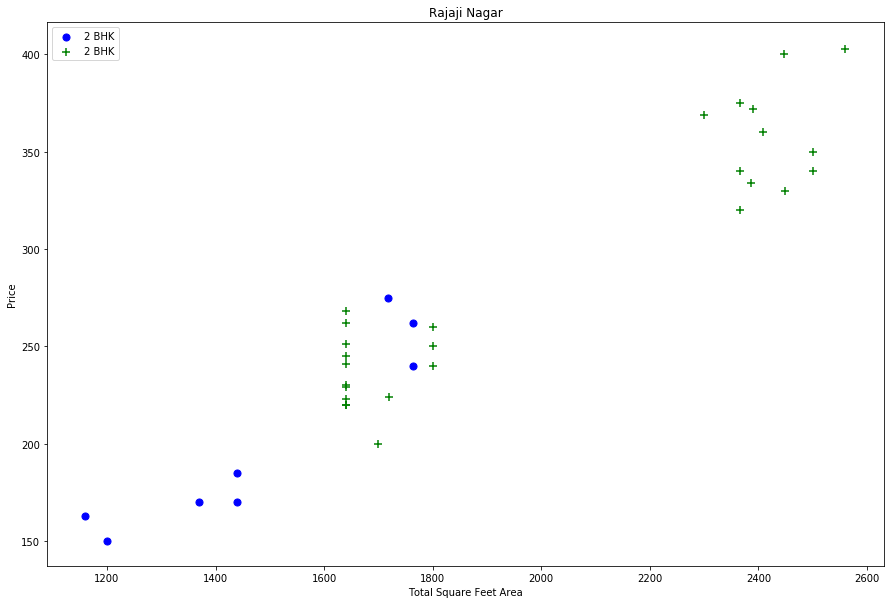

In [40]:
scatter_plot(df6,"Rajaji Nagar")

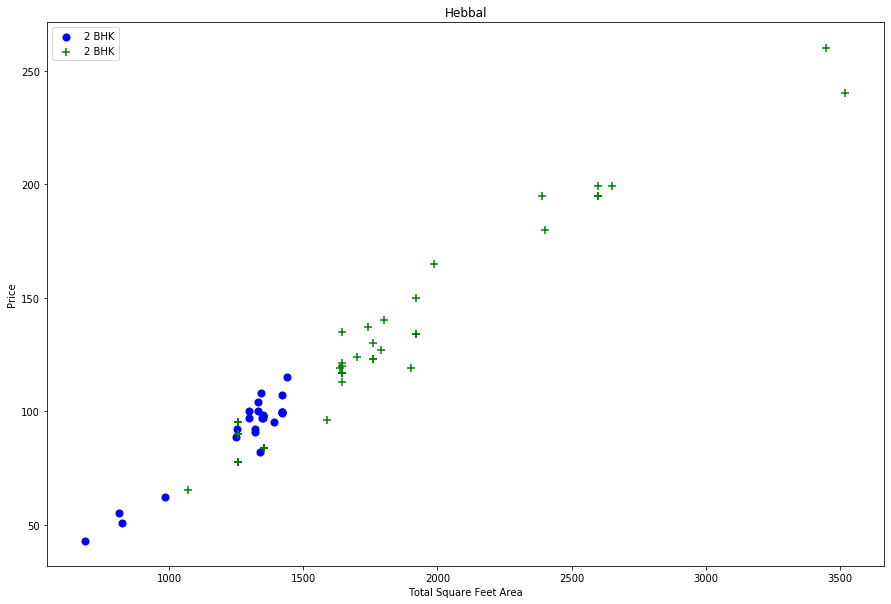

In [41]:
scatter_plot(df6,"Hebbal")

Text(0, 0.5, 'count')

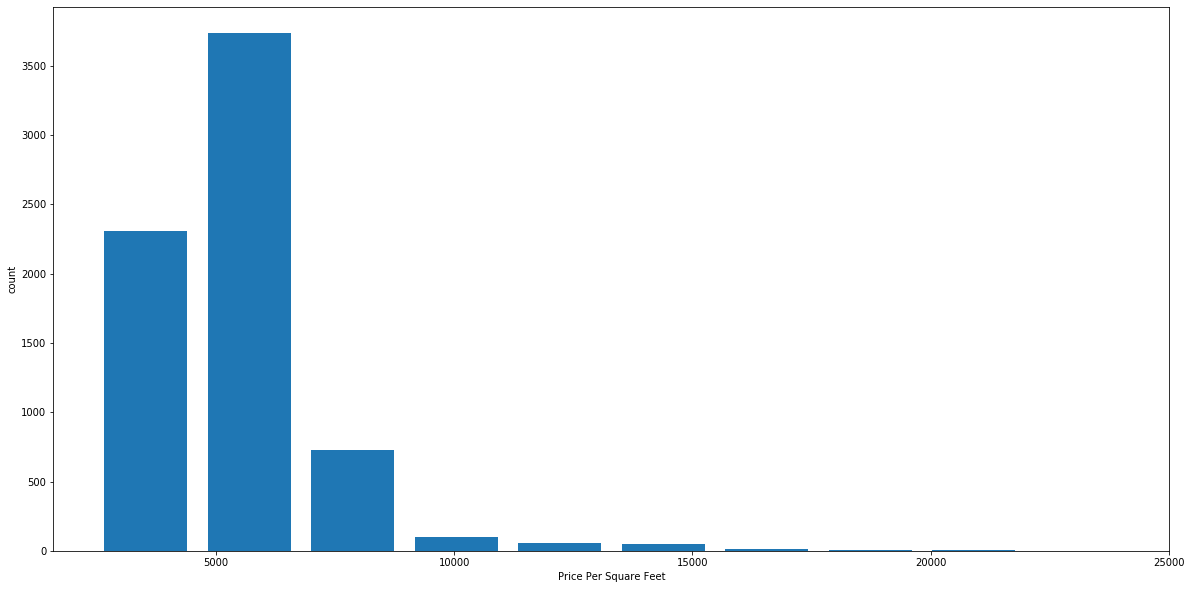

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

In [43]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3501,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5674,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
5730,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6537,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

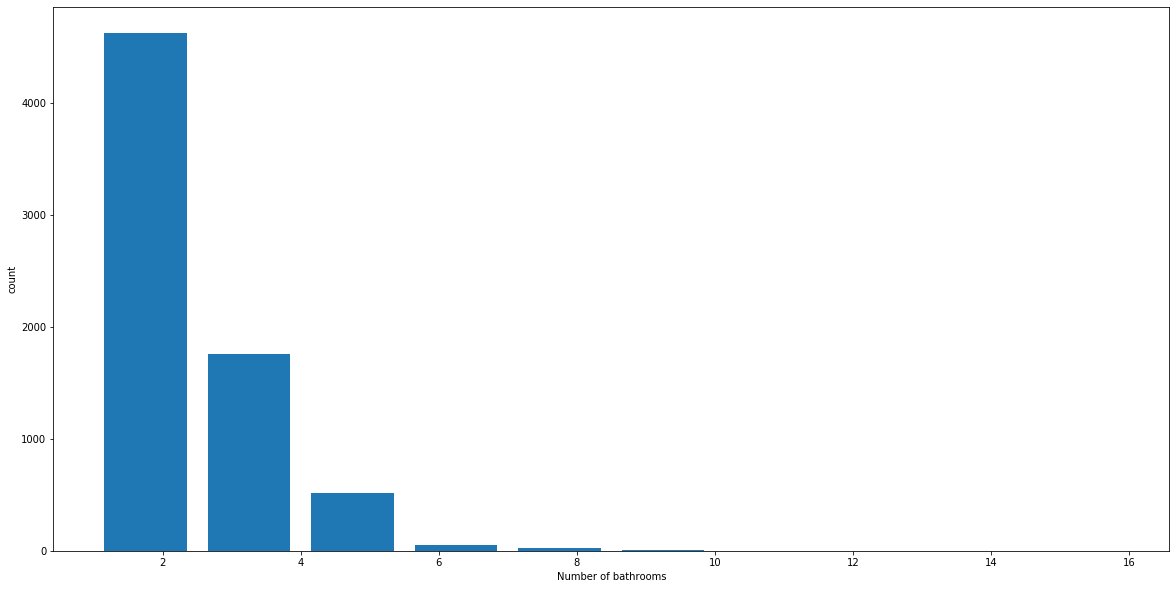

In [44]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [45]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1122,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03252
4442,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03433


In [46]:
df7  = df6[df6.bath<df6.bhk+2]
df7.shape

(6954, 7)

In [47]:
df8 = df7.drop(['size','price_per_sqft'],axis = "columns")
df8.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2
3,1st Phase JP Nagar,2825.0,4.0,250.0,4
4,1st Phase JP Nagar,1875.0,3.0,167.0,3
5,1st Phase JP Nagar,2024.0,3.0,157.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2
7,1st Phase JP Nagar,1077.0,2.0,93.0,2
8,1st Phase JP Nagar,1590.0,3.0,131.0,3
9,1st Phase JP Nagar,2180.0,3.0,210.0,3


#### Create Dummies for "location" feature 

In [48]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df9 =  pd.concat([df8,dummies.drop("other",axis='columns')],axis="columns")
df9.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2825.0,4.0,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2024.0,3.0,157.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1077.0,2.0,93.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1590.0,3.0,131.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,2180.0,3.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10 = df9.drop("location",axis = "columns")
df10.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,250.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024.0,3.0,157.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1077.0,2.0,93.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1590.0,3.0,131.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2180.0,3.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [51]:
df10.shape

(6954, 245)

In [52]:
#Create "x" which is Independent variable
x = df10.drop("price",axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df10.price
y.head()

0    194.0
1    235.0
2    148.0
3    250.0
4    167.0
Name: price, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9490339184967699

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2, random_state=0)
cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.91129928, 0.9244115 , 0.91419402, 0.91744365, 0.90703825])

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    


SyntaxError: invalid syntax (<ipython-input-57-f56c8c24d5b1>, line 1)